# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

The null hypothesis: the mean temperature is 98.6 Fahrenheit. 

The alternative hypothesis: the mean would actually be less than 98.6 Fahrenheit. 

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')
print df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')


In [225]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

#### Is the distribution of body temperatures normal? 

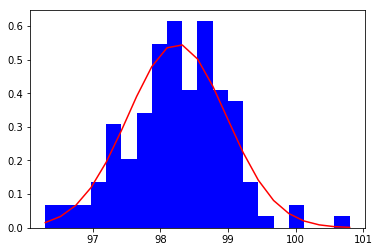

In [226]:
n, bins, patches = plt.hist(df.temperature, 20, normed=1, color='b')
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')

plt.show()

Combining the normal distribution plot and histogram plot, the body temperature data represents a normal distribution. 

#### Is the true population mean really 98.6 degrees F? 


This data requires a one-sample test because the one sample t-test compares the mean of the dataset, 98.25 F, to a known value, 98.6 F.  

In [227]:
stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [228]:
mu= 98.6
x=np.mean(df.temperature)
std = np.std(df.temperature)
sqrt=len(df)**0.5
SE = stats.sem(df.temperature)
Z=float((x-mu)/SE)
print Z

-5.45482329236


In [229]:
z = df.temperature
y = df.heart_rate
theta_hat = z.mean() - y.mean()
sigma_bar = np.sqrt((  np.sum((z-z.mean())**2) + np.sum((y-y.mean())**2) ) / (z.size + y.size - 2.0))
t = 1.0 - stats.t.cdf(theta_hat / (sigma_bar * np.sqrt((1.0/z.size)+(1.0/y.size))),14)
print t

5.55111512313e-16


A z-score and a t-score are both used in hypothesis testing. The general rule of thumb for when to use a t score is when the sample has size < 30 and has an unknown population standard deviation. Since the sample size is 130 and the standard deviation is 0.733183, I should use z-score. Furthermore, when I calculated the z score and t score, the result from t-score just did not make sense.  

The p-value is also 2.4106320415561276e-07, which is a very small value. It is therefore safe to say that the null hypothesis can be rejected. 

#### Draw a small sample of size 10 from the data and repeat both tests.

In [230]:
new_df = df.sample(n=10)

In [231]:
new_mu= 98.6
new_x=np.mean(new_df.temperature)
new_std = np.std(new_df.temperature)
new_sqrt=len(new_df)**0.5
new_SE= stats.sem(new_df.temperature)
new_Z=float((new_x-new_mu)/new_SE)
print new_Z

0.0


In [232]:
new_z = new_df.temperature
new_y = new_df.heart_rate
new_theta_hat = new_z.mean() - new_y.mean()
new_sigma_bar = np.sqrt((  np.sum((new_z-new_z.mean())**2) + np.sum((new_y-new_y.mean())**2) ) / (new_z.size + new_y.size - 2.0))
new_t = 1.0 - stats.t.cdf(new_theta_hat / (new_sigma_bar * np.sqrt((1.0/new_z.size)+(1.0/new_y.size))),14)
print new_t

8.79563651912e-08


In [233]:
stats.normaltest(new_df.temperature)

NormaltestResult(statistic=1.3332634243456611, pvalue=0.51343506558176899)

With smaller sample, the p value dropped to 0.00255, providing strong evidence against the null hypothesis.

#### At what temperature should we consider someone's temperature to be "abnormal"?

In [234]:
stats.t.interval(0.95,df.temperature)

(array([-1.9841428 , -1.98436663, -1.98451818, -1.98416746, -1.98446745,
        -1.98416746, -1.98446745, -1.98426664, -1.98436663, -1.98431654,
        -1.98426664, -1.98480095, -1.98441694, -1.98429156, -1.98451818,
        -1.98426664, -1.98439176, -1.98441694, -1.98467161, -1.98411818,
        -1.98439176, -1.98441694, -1.98431654, -1.98436663, -1.98451818,
        -1.98446745, -1.98451818, -1.98441694, -1.98436663, -1.98444217,
        -1.98439176, -1.98456911, -1.98434156, -1.98431654, -1.9841428 ,
        -1.98409361, -1.98419218, -1.98439176, -1.98449279, -1.9848792 ,
        -1.98436663, -1.98436663, -1.98474905, -1.98467161, -1.98421695,
        -1.98449279, -1.98462026, -1.98462026, -1.98449279, -1.98469737,
        -1.98424177, -1.98439176, -1.98434156, -1.98431654, -1.98441694,
        -1.98431654, -1.98426664, -1.98441694, -1.98441694, -1.98456911,
        -1.98419218, -1.98436663, -1.98441694, -1.98431654, -1.98429156,
        -1.98462026, -1.98462026, -1.98431654, -1.9

In [235]:
max_CI=x-(Z*SE)
min_CI=x+(Z*SE)
print min_CI,max_CI

97.8984615385 98.6


In [236]:
margin_of_error = Z * (std/math.sqrt(len(df)))
print margin_of_error

-0.349417513869


In [237]:
print "Abnormal Temperature"
print "Mean: ", 98.6 
print "Margin of error: ", margin_of_error
print "Confidence interval: ", min_CI, ',', max_CI

Abnormal Temperature
Mean:  98.6
Margin of error:  -0.349417513869
Confidence interval:  97.8984615385 , 98.6


The 95% confidence interval is from 97.9 to 98.6, and an abnormal temperature would be below 97.9 and above 98.6 Fahrenheit. 

#### Is there a significant difference between males and females in normal temperature?

The null hypothesis is now saying that males and females bodies have a normal body temperature. The alternative hypothesis argues that it would be either greater or lesser than the normal body temperature. 

In [238]:
F=df[df.gender=='F']
M=df[df.gender=='M']

In [239]:
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

In [240]:
M.temperature.describe() 

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [241]:
F.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [242]:
n=len(M)
mean_M=np.mean(M.temperature)
std_M = np.std(M.temperature)
mean_F = np.mean(F.temperature)
std_F = np.std(F.temperature)
SE_FM= (((std_M**2)+(std_F**2))/n)**0.5
mean_diff=mean_M-mean_F

Z = (mean_diff - 0)/SE_FM #0 because testing equal means

min_CI= mean_diff-(Z*SE_FM)
max_CI= mean_diff+(Z*SE_FM)

print "Women and Men"
print "Mean: ", mean_diff
print "Margin of error: ", SE_FM
print "Confidence interval: ", min_CI, ',', max_CI

Women and Men
Mean:  -0.289230769231
Margin of error:  0.125576685212
Confidence interval:  0.0 , -0.578461538461


In [243]:
stats.ttest_ind(M.temperature,F.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

With a p value of 0.0239, I can reject the null hypothesis. This rejection indicates that there is a difference between men and women's natural body temperature.

#### Conclusion

The null hypothesis that the mean temperature is 98.6 Fahrenheit is statistically incorrect. The p-value is also 2.4106320415561276e-07 and therefore it is therefore safe to say that the null hypothesis can be rejected.